<a href="https://colab.research.google.com/github/Shuraimi/PyTorch-ZTM/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [67]:
# Check for GPU
!nvidia-smi

Wed Sep 10 14:21:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P0             30W /   70W |     188MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [68]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

2.8.0+cu126


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

>1. Manufacturing industries to detect defective products from good ones
>2. Self driving cars
>3. Multi class classification tasks (such as classifying food, varieties of dogs etc)
>4. Traffic managament and more

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

> Overfitting is a problem in machine learning where the model performs well on the train data and does not generalise well on the test data. The model memorizes the training data. The model also has hig variance during overfitting.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

>1. Use a simple model as compared to the model trained
>2. Gather more data
>3. Use regularisation methods like L1 or L2 norm if possible
>4. CV methods
>5. Early stopping and Ensemble methods

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [69]:
import torchvision

In [70]:
from torchvision import transforms

transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])

In [71]:
import pathlib
path=pathlib.Path('data')
path.mkdir(exist_ok=True)
train_data=torchvision.datasets.MNIST(root=path/'train',train=True,transform=transform,download=True)
test_data=torchvision.datasets.MNIST(root=path/'test',train=False,transform=transform,download=True)

In [72]:
len(test_data)

10000

In [73]:
len(train_data)

60000

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [74]:
import matplotlib.pyplot as plt

In [75]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

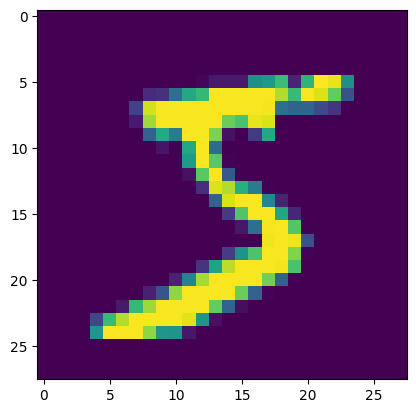

In [76]:
plt.imshow(train_data[0][0].squeeze())

In [77]:
len(train_data)

60000

In [78]:
rand_int=torch.randint(0,60000,size=[1]).item()

In [79]:
rand_int

46339

In [80]:
img,label=train_data[0]

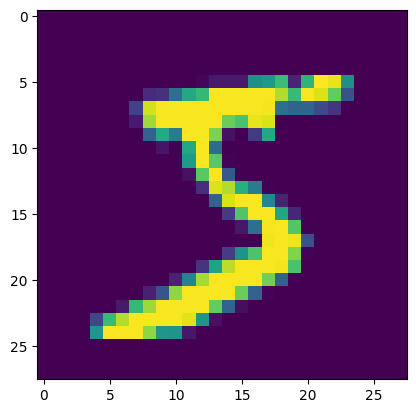

In [81]:
plt.imshow(img.squeeze())

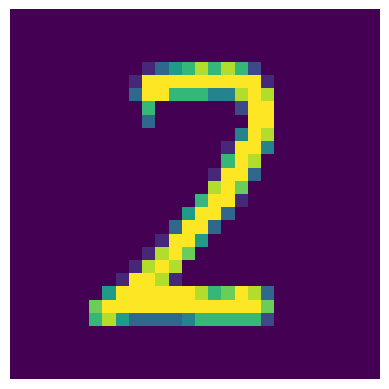

In [82]:
rand_int=torch.randint(0,60000,size=[1]).item()
img,label=train_data[rand_int]
plt.axis('off')
plt.imshow(img.squeeze())

In [83]:
len(test_data)

10000

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [84]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dl=DataLoader(train_data,
                    BATCH_SIZE,
                    shuffle=True)
test_dl=DataLoader(test_data,
                   BATCH_SIZE,
                   shuffle=False)


In [85]:
print(f'Length of train dataloader: {len(train_dl)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader : {len(test_dl)} batches of {BATCH_SIZE}')

Length of train dataloader: 1875 batches of 32
Length of test dataloader : 313 batches of 32


In [86]:
len(train_dl)

1875

# Had forgotten this ⬇

In [87]:
train_features_batch,train_target_batch=next(iter(train_dl))
train_features_batch.shape,train_target_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [88]:
from torch import nn

In [89]:
import torch.nn as nn

class TinyVGG(nn.Module):

    def __init__(self,input_channels,hidden_state,output_shape):
        super().__init__()
        self.layer1=nn.Sequential(
             nn.Conv2d(in_channels=input_channels,out_channels=hidden_state,kernel_size=3,stride=1,padding=1),
             nn.ReLU(),
             nn.Conv2d(in_channels=hidden_state,out_channels=hidden_state,kernel_size=3,stride=1,padding=1),
             nn.ReLU(),
             nn.MaxPool2d(kernel_size=2,stride=2)

    )
        self.layer2=nn.Sequential(
            nn.Conv2d(hidden_state,hidden_state,3,1,padding=1), # Added padding
            nn.ReLU(),
            nn.Conv2d(hidden_state,hidden_state,3,1,padding=1), # Added padding
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_state*7*7,
                      out_features=output_shape)
        )

    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.classifier(x)
        return x

In [90]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [92]:
model=TinyVGG(input_channels=1,hidden_state=10,output_shape=len(train_data.classes))

In [93]:
model

TinyVGG(
  (layer1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [94]:
model.parameters

<bound method Module.parameters of TinyVGG(
  (layer1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)>

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [95]:
# step up loss and optimiser
loss_func=nn.CrossEntropyLoss()
optimiser=torch.optim.SGD(model.parameters(),lr=0.01)

Training loop

1. get predictions
2. calculate the loss
3. zero grad
4. loss.backwards()
5. optimiser step

In [96]:
!pip install torchmetrics
from torchmetrics.classification import MulticlassAccuracy

In [97]:
metric=MulticlassAccuracy(num_classes=10)

In [98]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

In [ ]:

# epochs=5
# for epoch in tqdm(range(epochs)):
#     #training loop
#     train_loss=0
#     for batch,(X,y) in enumerate(train_dl):
#         # get preds
#         preds=model(X)
#         #calculate loss
#         loss=loss_func(preds,y)
#         # forgot this
#         train_loss+=loss
#         #zero grads
#         optimiser.zero_grad()
#         #loss backward
#         loss.backward()
#         #optimiser step
#         optimiser.step()
#     # loss/=epoch not epoch its len(train_dl)
#     loss/=len(train_dl)
#     print(f'The training loss is {loss}')

#     #test loop
#     test_loss,test_acc=0,0
#     # switch on inference mode
#     with torch.inference_mode():
#         for X,y in test_dl:
#             y_preds=model(X)

#             loss=loss_func(y_preds,y)
#             test_loss+=loss
#             test_acc+=metric(y,
#                          y_preds.argmax(dim=1))# forgot this line
#         test_loss/=len(test_dl)
#         test_acc/=len(test_dl)
#         print(f'Test loss {test_loss:.5f} Test accuracy {test_acc:.2f}%\n')






100%
 5/5 [04:23<00:00, 52.47s/it]
Tthe training loss is 3.7934725696686655e-05
Test loss 0.05913 Test accuracy 0.98%

Tthe training loss is 4.171782347839326e-05
Test loss 0.05634 Test accuracy 0.98%

Tthe training loss is 1.2398869557728176e-06
Test loss 0.05420 Test accuracy 0.98%

Tthe training loss is 3.669144643936306e-05
Test loss 0.05309 Test accuracy 0.98%

Tthe training loss is 6.782274431316182e-05
Test loss 0.05484 Test accuracy 0.98%


Device agnoistic code

> send X and y to device
> send model to device
> and metric also to device

In [99]:
metric=MulticlassAccuracy(num_classes=10).to(device)

In [100]:
epochs=5
for epoch in tqdm(range(epochs)):
    #training loop
    train_loss=0
    for batch,(X,y) in enumerate(train_dl):
        X,y=X.to(device),y.to(device)
        model=model.to(device)
        # get preds
        preds=model(X)
        #calculate loss
        loss=loss_func(preds,y)
        # forgot this
        train_loss+=loss
        #zero grads
        optimiser.zero_grad()
        #loss backward
        loss.backward()
        #optimiser step
        optimiser.step()
    # loss/=epoch not epoch its len(train_dl)
    loss/=len(train_dl)
    print(f'The training loss is {loss}')

    #test loop
    test_loss,test_acc=0,0
    # switch on inference mode
    with torch.inference_mode():
        for X,y in test_dl:
            X,y=X.to(device),y.to(device)
            model=model.to(device)
            y_preds=model(X)

            loss=loss_func(y_preds,y)
            test_loss+=loss
            test_acc+=metric(y,
                         y_preds.argmax(dim=1))# forgot this line
        test_loss/=len(test_dl)
        test_acc/=len(test_dl)
        print(f'Test loss {test_loss:.5f} Test accuracy {test_acc:.2f}%\n')

  0%|          | 0/5 [00:00<?, ?it/s]

The training loss is 0.0004369899688754231
Test loss 0.19048 Test accuracy 0.94%

The training loss is 3.8578666135435924e-05
Test loss 0.12364 Test accuracy 0.96%

The training loss is 6.633037992287427e-05
Test loss 0.08255 Test accuracy 0.97%

The training loss is 3.0299863283289596e-05
Test loss 0.07666 Test accuracy 0.97%

The training loss is 9.41153211897472e-06
Test loss 0.06531 Test accuracy 0.98%



## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

logits->prediction probs->labels

In [ ]:
# # get logits
# preds=model(train_data)# get predictions on the whole dataset

# # convert logits to prediction probs using softmax since multi class classification
# pred_probs=torch.softmax(preds,dim=0)

# # get labels from pred probs
# pred_labels=torch.argmax(pred_probs,dim=0)

In [101]:
def make_preds(model,data,device:torch.device=device):

    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:

            # add an extra dimension to sample and send to device
            sample=torch.unsqueeze(sample,dim=0).to(device)
            print(sample.shape)

            # get logits
            preds=model(sample)
            print(preds.shape)

            # convert logits to pred probs abnd squeeze not unsqueze
            pred_prob=torch.softmax(preds.squeeze(),dim=0)
            print(pred_prob.shape)

            # put pred_probs off gpu for further calculation
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs) # missed the last two lines

separating test samples and labels

In [102]:
import random
random.seed(42)
test_samples,test_labels=[],[]
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [103]:
len(test_data)

10000

In [104]:
# view first test sample
print(test_samples[0])
print(test_labels[0])
print(test_samples[0].shape)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [105]:
test_samples[0].shape

torch.Size([1, 28, 28])

now make predictions

In [106]:
pred_probas=make_preds(model,test_samples)

torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
torch.Size([10])


In [107]:
pred_probas[:2]

tensor([[1.3073e-09, 1.3829e-08, 1.0000e+00, 4.0882e-08, 1.4484e-17, 2.6454e-14,
         5.5377e-15, 1.2985e-09, 6.3222e-07, 2.6406e-14],
        [2.7788e-06, 9.7746e-01, 1.0823e-05, 1.5557e-04, 1.6225e-03, 1.2449e-04,
         9.4252e-05, 1.5699e-04, 2.0175e-02, 2.0057e-04]])

In [108]:
len(pred_probas)

9

In [109]:
#now get labels
pred_labels=pred_probas.argmax(dim=1)

In [110]:
pred_labels[:10]

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [111]:
# test labels
test_labels[:10]

[2, 1, 2, 4, 6, 6, 4, 9, 1]

Now compare and visualise them

In [112]:
len(test_samples)

9

0
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.000

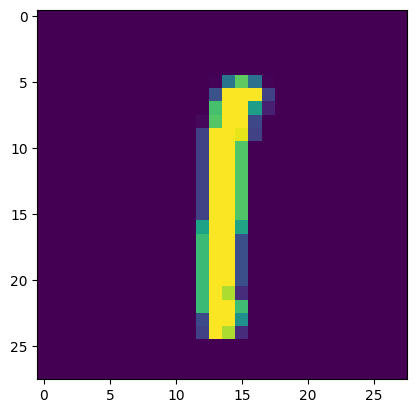

In [113]:
for i,sample in enumerate(test_samples):
    print(i)
    print(sample)
    print(sample.shape)
    plt.imshow(sample.squeeze())

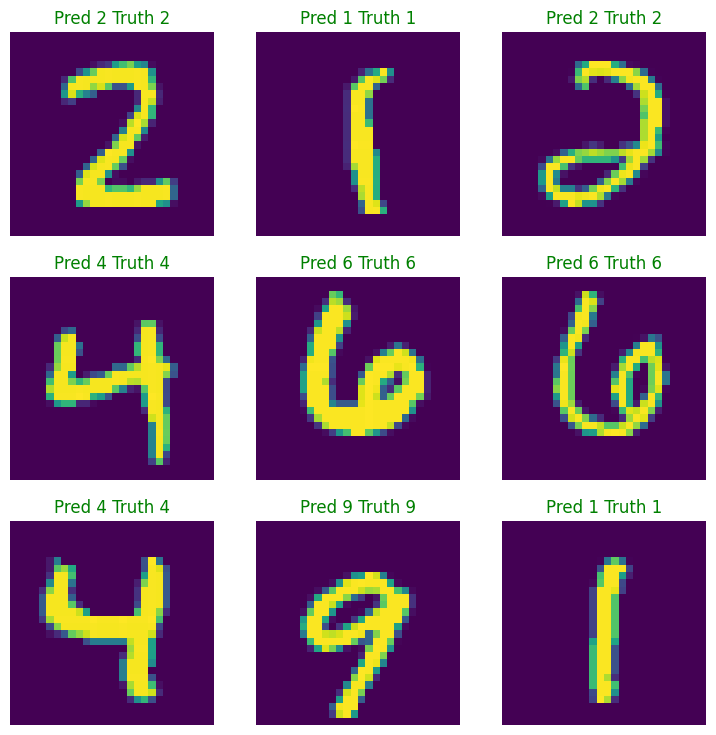

In [114]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):

    plt.subplot(nrows,ncols,i+1)

    plt.imshow(sample.squeeze())

    pred_label=pred_labels[i]

    truth_label=test_labels[i]

    plt.axis('off')

    if pred_label==truth_label:
        plt.title(f'Pred {pred_label} Truth {truth_label}',c='g')
    else:
        plt.title(f'Pred {pred_label} Truth {truth_label}',c='r')

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

Step 1:

Get predictions on test data using the trained model

In [115]:
pred_labels=[]
model.eval()
with torch.inference_mode():
    for X,y in test_dl:

        X,y=X.to(device),y.to(device)

        logits=model(X)

        pred_prob=torch.softmax(logits,dim=1)

        pred_label=pred_prob.argmax(dim=1)

        pred_labels.append(pred_label.cpu())
pred_labels_tensor=torch.cat(pred_labels)

In [116]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [117]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


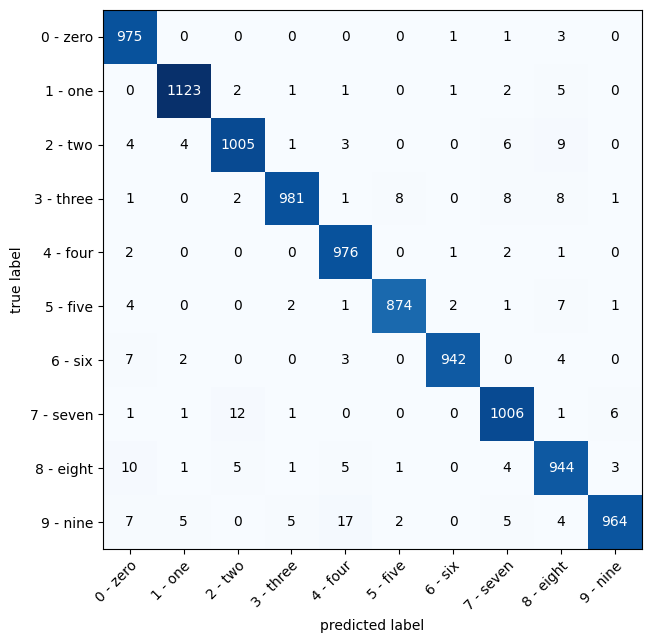

In [118]:
from inspect import CO_ASYNC_GENERATOR
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(num_classes=10,task='multiclass')
confmat_tensor=confmat(preds=pred_labels_tensor,target=test_data.targets)

fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=train_data.classes,
    figsize=(10,7)
)

In [119]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_MNIST.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_MNIST.pth


In [125]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = TinyVGG(input_channels=1,hidden_state=10,output_shape=len(train_data.classes))

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
rand_ten=torch.rand((1,3,64,64))
rand_ten

In [123]:
conv_layer=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=2,padding=1)

In [124]:
conv_layer(rand_ten).shape

torch.Size([1, 10, 65, 65])

In [128]:
conv_layer2=nn.Conv2d(3,10,3,1,0)

In [129]:
conv_layer2(rand_ten).shape

torch.Size([1, 10, 62, 62])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?



Didn't do this one